In [2]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# 훈련을 해야 변환이 가능하다!
# 특성의 제곱(2개), 특성끼리의 곱(1개) 즉, 원래 특성 2개 + 특성의 제곱 2개 + 특성끼리의 곱 1개 = 총 5개 feature 생성!

[[2. 3. 4. 6. 9.]]


In [15]:
poly.fit(train_input, train_target)
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [17]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [20]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
# train_poly를 넣어서 다중 회귀 모델이 되었다.
print(lr.score(train_poly, train_target))

0.9903183436982126


In [25]:
print(lr.score(test_poly, test_target))

0.9714559911594095


In [30]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [33]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999976599

In [35]:
lr.score(test_poly, test_target)
# 지나치게 과도하게 과대적합된 현상이다!

-144.4072001577299

In [37]:
# 규제하기 전에 정규화부터!
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9896101671037343

In [41]:
ridge.score(test_scaled, test_target)

0.9790693977615398

In [58]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

In [59]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# alpha 는 무엇인가?
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

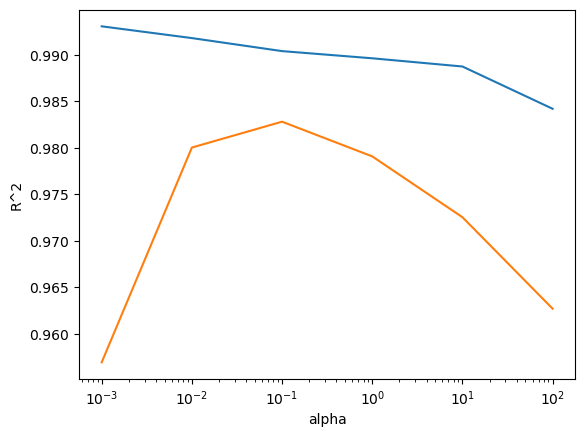

In [62]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# 파란색은 train set
# 주황색은 test set

In [64]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
ridge.score(train_scaled, train_target)

0.9903815817570367

In [65]:
print(np.sum(ridge.coef_ == 0))

0
